<h1>Exploratory Data Analysis - Loan Eligibility Prediction</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Importing Data</h3>

In [2]:
# Loading the dataset into the notebook
data = pd.read_csv('../data/Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There is quite a number of non-numeric features which is not appropriate for a lot of ML Models. This will be addressed during the data pre-processing stage.

In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Quite a few features have missing values. Target variable 'Loan_Status' has no missing values.

<h3>Duplications</h3>

In [5]:
df = data

In [38]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There are no duplicated rows.

<h3>Converting features into numeric values to measure correlation</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Converting gender into numeric variables to check for correlation
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
df['Loan_Status'].replace({'N':0, 'Y':1}, inplace=True)
df['Married'].replace({'No':0, 'Yes':1}, inplace=True)
df['Dependents'].replace({'3+':3}, inplace=True)
df['Self_Employed'].replace({'No':0, 'Yes':1}, inplace=True)
df['Education'].replace({'Not Graduate':0, 'Graduate':1}, inplace=True)
df['Property_Area'].replace({'Urban':2, 'Rural':0, 'Semiurban':1}, inplace=True)
df = df.astype({'Dependents':'float'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


In [9]:
df = df.astype({'Dependents':'float'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


<h3>Finding Erroneous Data</h3>

In [11]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


Minimum for Loan Amount is 9. Who takes a Loan for 9 dollars? This could be erroneous data. Lets take a closer look at the values for Loan Amount

<AxesSubplot:>

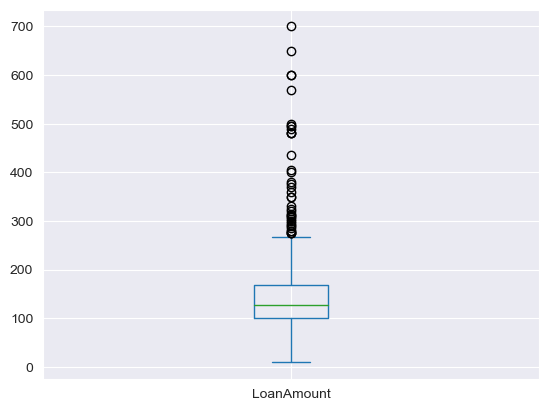

In [23]:
df['LoanAmount'].plot.box()

In [25]:
df['LoanAmount'].sort_values()

568     9.0
14     17.0
94     25.0
133    25.0
555    26.0
       ... 
479     NaN
524     NaN
550     NaN
551     NaN
605     NaN
Name: LoanAmount, Length: 614, dtype: float64

In [26]:
df[df['LoanAmount']==9.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
568,LP002840,0.0,0.0,0.0,1,0.0,2378,0.0,9.0,360.0,1.0,2,0


It makes no sense for the loan term to be 360 months over a loan for 9 dollars. The record will be dropped.

In [31]:
test = df.drop(568, axis=0)

In [32]:
test.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366759,0.174020,-0.047586,-0.011359,0.052436,0.082346,0.101642,-0.074417,0.018061,-0.020411,0.014756
Married,0.366759,1.000000,0.342395,-0.013059,0.000940,0.050312,0.076662,0.146353,-0.103338,0.005437,0.005676,0.086256
Dependents,0.174020,0.342395,1.000000,-0.058540,0.057364,0.118140,0.026582,0.162359,-0.100172,-0.049531,0.008392,0.004919
Education,-0.047586,-0.013059,-0.058540,1.000000,0.012708,0.141248,0.062798,0.172972,0.078567,0.081454,0.064282,0.087338
Self_Employed,-0.011359,0.000940,0.057364,0.012708,1.000000,0.140516,-0.011598,0.123069,-0.036883,0.004216,-0.030402,-0.003339
ApplicantIncome,0.052436,0.050312,0.118140,0.141248,0.140516,1.000000,-0.117106,0.570938,-0.045089,-0.014341,-0.008523,-0.005920
CoapplicantIncome,0.082346,0.076662,0.026582,0.062798,-0.011598,-0.117106,1.000000,0.187572,-0.059643,-0.001581,0.011646,-0.060652
LoanAmount,0.101642,0.146353,0.162359,0.172972,0.123069,0.570938,0.187572,1.000000,0.040297,-0.007152,-0.042576,-0.041586
Loan_Amount_Term,-0.074417,-0.103338,-0.100172,0.078567,-0.036883,-0.045089,-0.059643,0.040297,1.000000,0.001258,-0.079422,-0.020618
Credit_History,0.018061,0.005437,-0.049531,0.081454,0.004216,-0.014341,-0.001581,-0.007152,0.001258,1.000000,-0.002925,0.563978


After dropping the row, the correlation between LoanAmount and Loan Amount Term has gone up to 4%.

In [34]:
df=test

<h3>Correlation</h3>

<AxesSubplot:>

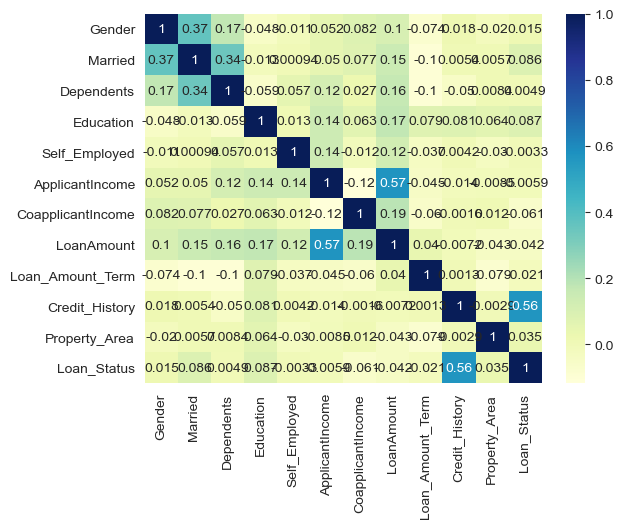

In [39]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Credit history is the only feature with a Pearson Correlation value of more than 10% (56%). It does have quite a lot of missing values (50) and so will need to be handled with care. Credit History does not have any other significant correlations in the data.

With that said, LoanAmount and Applicant Income seem to be quite highly correlated with a pearson coefficient of 0.57. We might have to consider a dimensionality reduction technique for this.

C:\Users\ituser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

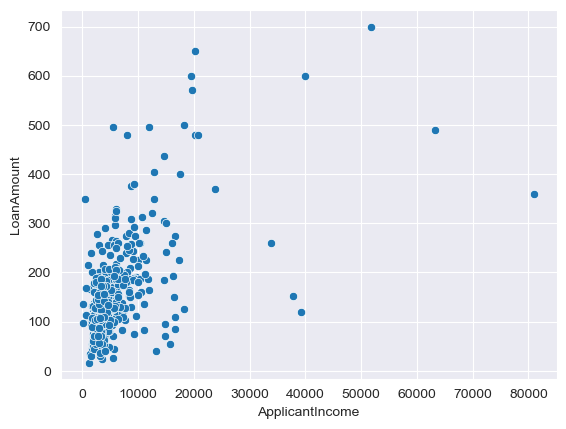

In [40]:
sns.scatterplot(df['ApplicantIncome'], df['LoanAmount'])

In [43]:
df.corr(method='kendall')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366759,0.159673,-0.047586,-0.011359,0.057546,0.180943,0.122671,-0.084063,0.018061,-0.017384,0.014756
Married,0.366759,1.000000,0.339428,-0.013059,0.000940,0.003213,0.235388,0.156238,-0.120214,0.005437,0.005323,0.086256
Dependents,0.159673,0.339428,1.000000,-0.048562,0.069289,0.112015,-0.037969,0.117255,-0.107815,-0.040691,0.027410,0.003203
Education,-0.047586,-0.013059,-0.048562,1.000000,0.012708,0.156094,0.011288,0.139313,0.073641,0.081454,0.060000,0.087338
Self_Employed,-0.011359,0.000940,0.069289,0.012708,1.000000,0.164190,-0.057677,0.095221,-0.043825,0.004216,-0.028745,-0.003339
ApplicantIncome,0.057546,0.003213,0.112015,0.156094,0.164190,1.000000,-0.232114,0.370476,-0.031594,0.036227,-0.050405,-0.006022
CoapplicantIncome,0.180943,0.235388,-0.037969,0.011288,-0.057677,-0.232114,1.000000,0.185591,-0.011391,-0.005865,-0.060544,0.028351
LoanAmount,0.122671,0.156238,0.117255,0.139313,0.095221,0.370476,0.185591,1.000000,0.033829,-0.000812,-0.083701,-0.032468
Loan_Amount_Term,-0.084063,-0.120214,-0.107815,0.073641,-0.043825,-0.031594,-0.011391,0.033829,1.000000,0.014533,-0.059114,-0.025144
Credit_History,0.018061,0.005437,-0.040691,0.081454,0.004216,0.036227,-0.005865,-0.000812,0.014533,1.000000,-0.003276,0.563978


<h3>Is it a Class Imbalance Problem?</h3>

1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

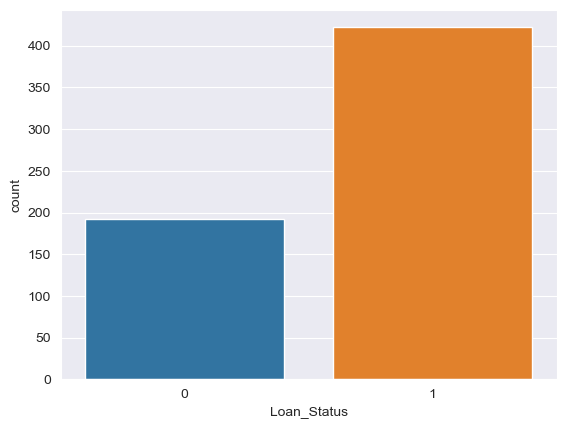

In [15]:
# The count for each class of the variable
print(df['Loan_Status'].value_counts())
sns.countplot(x=df['Loan_Status'])

As can be seen above, there is a class mismatch: Those with approved loans are about double those without. This is a class imbalance problem as well. This can cause an issue with a lot of ML models.

<h3>Probability Distribution</h3>

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>]], dtype=object)

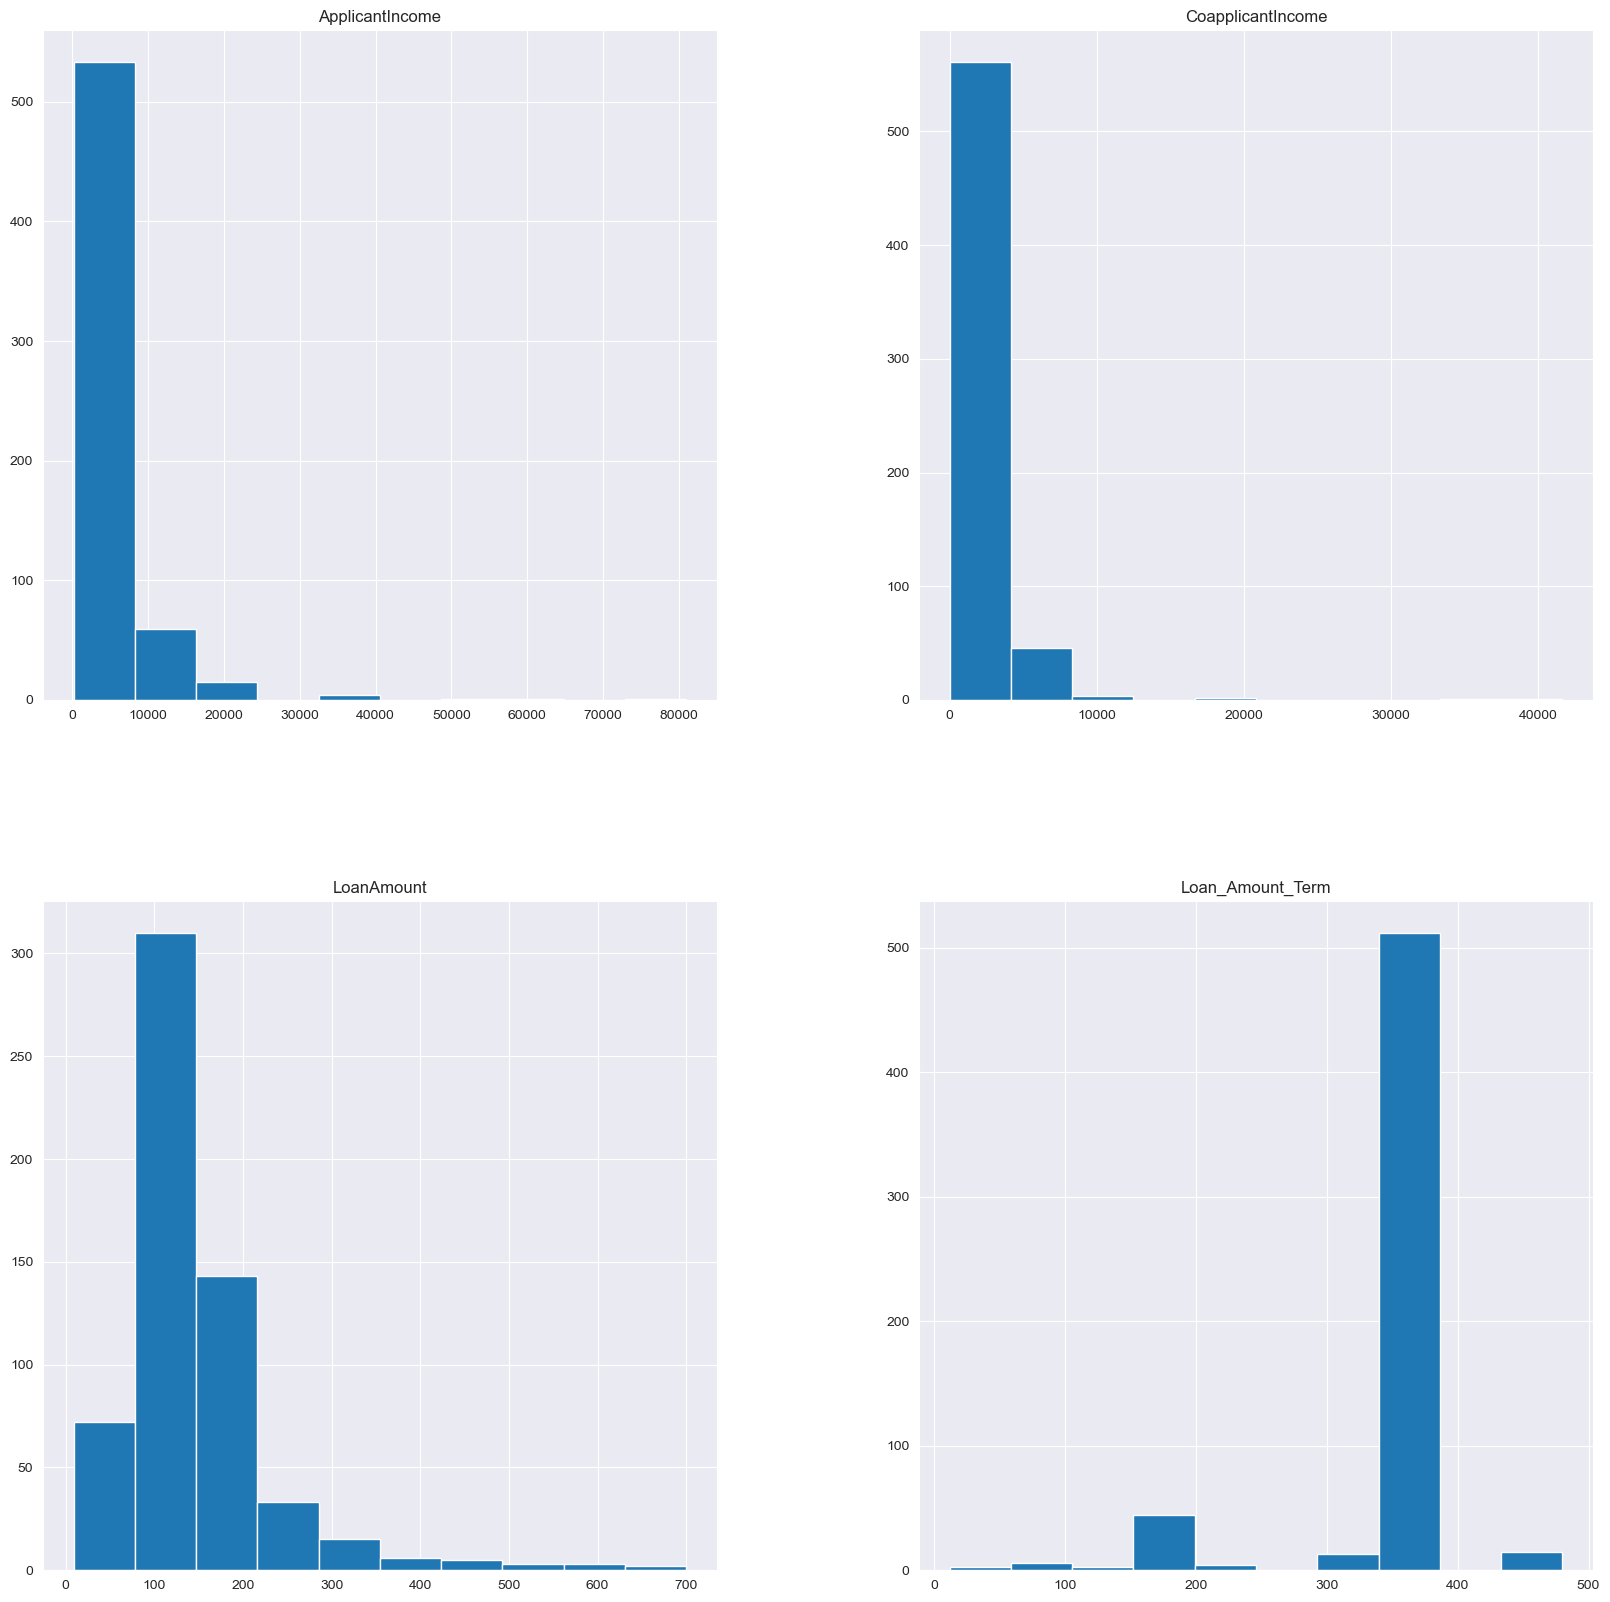

In [16]:
df.hist(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], figsize=(20,20))

A lot of the features in the dataset do not exhibit a gaussian distribution. This needs to be addressed as well before feeding the data into an ML model. Missing data may need to be addressed first.

<h3>Data Variance and Outliers</h3>

<AxesSubplot:>

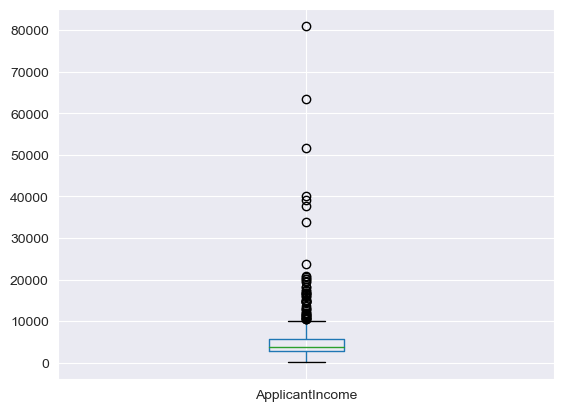

In [17]:
df.boxplot('ApplicantIncome')

<AxesSubplot:>

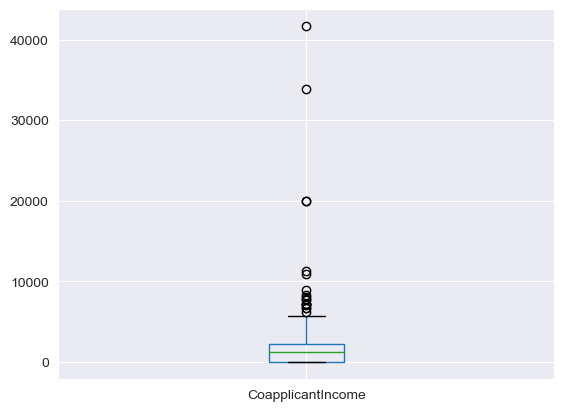

In [18]:
df.boxplot('CoapplicantIncome')

<AxesSubplot:>

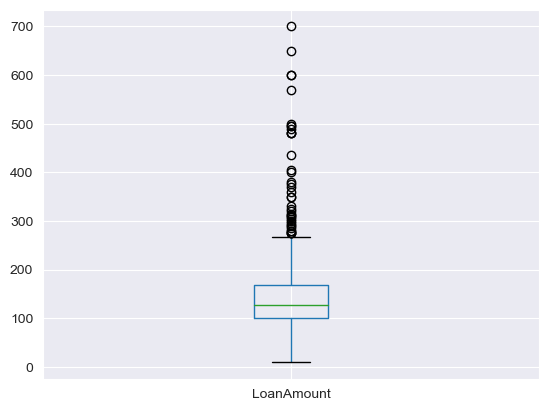

In [19]:
df.boxplot('LoanAmount')

<AxesSubplot:>

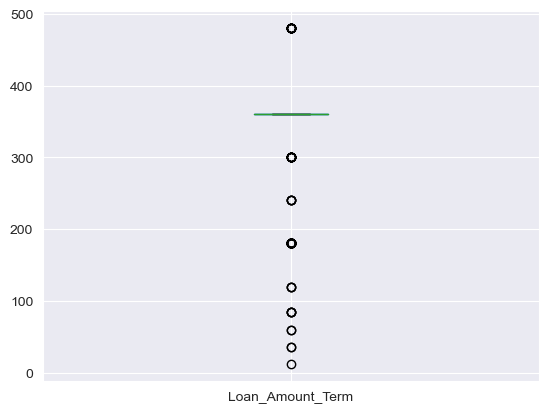

In [20]:
df.boxplot('Loan_Amount_Term')

In [41]:
df['Loan_Amount_Term'].describe()

count    599.000000
mean     341.969950
std       65.170672
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64